In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from scipy.signal import butter, filtfilt

In [2]:
#import data 

df_nov_10 = pd.read_csv("/Users/emil/repos/capstone/data/raw/sensor_data.csv", names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"])
df_ecg_rubberwrist = pd.read_csv('/Users/emil/repos/capstone/data/raw/2021-11-18-16-43-50.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )
df_ecg_wrist = pd.read_csv('/Users/emil/repos/capstone/data/raw/2021-11-18-17-04-07ECG_ONLY.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )
df_ppg_rubberright = pd.read_csv('/Users/emil/repos/capstone/data/raw/2021-11-18-17-16-13PPG_ONLY.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )
df_ppg_clip = pd.read_csv('/Users/emil/repos/capstone/data/raw/2021-11-18-17-45-10PPG_ONLY_CLIP.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )



In [3]:
#check first 5 rows of dataframe
df_nov_10.head()

,ecg_timestamp,ecg,ppg1_timestamp,ppg1_infrared,ppg1_red,ppg1_green,ppg2_timestamp,ppg2_infrared,ppg2_red,ppg2_green
0,105,0,119,7017,12,819,135.0,144441.0,4.0,7399.0
1,135,4095,150,7012,5,797,165.0,144442.0,0.0,7438.0
2,165,0,180,7017,8,788,195.0,144434.0,0.0,7442.0
3,195,4095,210,7009,0,797,225.0,144468.0,0.0,7463.0
4,225,0,240,7025,0,835,255.0,144493.0,0.0,7462.0


In [4]:
#butterworth filter & filtering
def butter_filtering(sig,fs,fc,order,btype): 
    """
    sig: original signal
    fs: sampling frequency
    fc: cut off frequency
    order: order of filter
    btype: type of filter (highpass/lowpass/bandpass)
    
    return: filtered signal
    """
    w = np.array(fc)/(fs/2)
    b, a = butter(order, w, btype =btype, analog=False)
    filtered = filtfilt(b, a, sig)
    return(filtered)

In [5]:
#choose original signals
ppg1_inf_nov10 = df_nov_10['ppg1_infrared'].values #ppg1 infrared
ppg2_inf_nov10 = df_nov_10['ppg2_infrared'].values #ppg2 infrared

ppg1_inf_rubberwrist = df_ecg_rubberwrist['ppg1_infrared'].values #ppg1 infrared, rubberband on wrist
ppg2_inf_rubberwrist = df_ecg_rubberwrist['ppg2_infrared'].values #ppg2 infrared, rubberband on wrist
ecg_chest = df_ecg_rubberwrist['ecg'].values #ecg on chest

ecg_wrist = df_ecg_wrist['ecg'].values #ecg on wrist

ppg1_rubber = df_ppg_rubberright['ppg1_infrared'].values #ppg1 infrared
ppg2_rubber = df_ppg_rubberright['ppg2_infrared'].values #ppg2 infrared

ppg1_clip = df_ppg_clip['ppg1_infrared'].values #ppg1 infrared

#filter the noisy signals bandpass=(0.5, 10)
ppg1_inf_nov10 = ppg1_inf_nov10[300:].astype('float') #got unexpected segs at the beginning. slice the signal and change value type to float
ppg1_inf_nov10_f = butter_filtering(ppg1_inf_nov10, 100, [0.5,10], 5, 'bandpass')
ppg2_inf_nov10 = ppg2_inf_nov10[300:]
ppg2_inf_nov10_f = butter_filtering(ppg2_inf_nov10, 100, [0.5,10], 5, 'bandpass')

ppg1_inf_rubberwrist_f = butter_filtering(ppg1_inf_rubberwrist, 100, [0.5,10], 5, 'bandpass')
ppg2_inf_rubberwrist_f = butter_filtering(ppg2_inf_rubberwrist, 100, [0.5,10], 5, 'bandpass')
ecg_chest_f = butter_filtering(ecg_chest, 100, [0.5,40], 5, 'bandpass')

ecg_wrist_f = butter_filtering(ecg_wrist, 100, [0.5,40], 5, 'bandpass')

ppg1_rubber_f = butter_filtering(ppg1_rubber, 100, [0.5,10], 5, 'bandpass')
ppg2_rubber_f = butter_filtering(ppg2_rubber, 100, [0.5,10], 5, 'bandpass')

ppg1_clip_f = butter_filtering(ppg1_clip, 100, [0.5,10], 5, 'bandpass')

In [6]:
#plot results
def plotting(sig, sig_f, name):
    '''
    sig: original signal
    sig_f: filtered signal
    name: name of the signal
    '''
    plt.figure(figsize = (12,6))
    plt.subplot(2,1,1)
    plt.plot(-1*sig)
    plt.title(name+' raw')
    plt.xlabel("samples");plt.ylabel("amplitude")

    plt.subplot(2,1,2)
    plt.plot(-1*sig_f)
    plt.title(name+' filtered')
    plt.xlabel("samples");plt.ylabel("amplitude")
    plt.show()

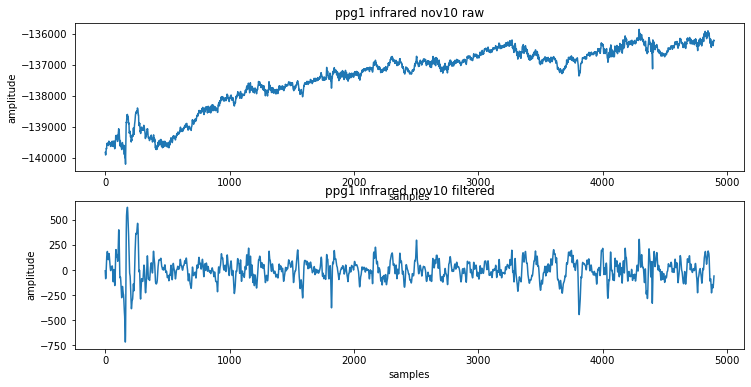

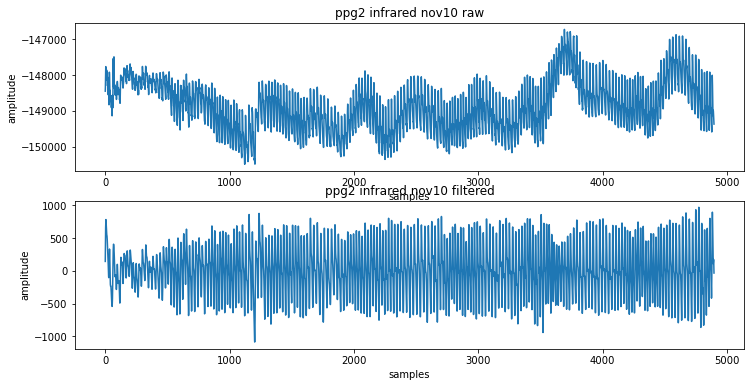

In [7]:
plotting(ppg1_inf_nov10, ppg1_inf_nov10_f, 'ppg1 infrared nov10')
plotting(ppg2_inf_nov10, ppg2_inf_nov10_f, 'ppg2 infrared nov10')

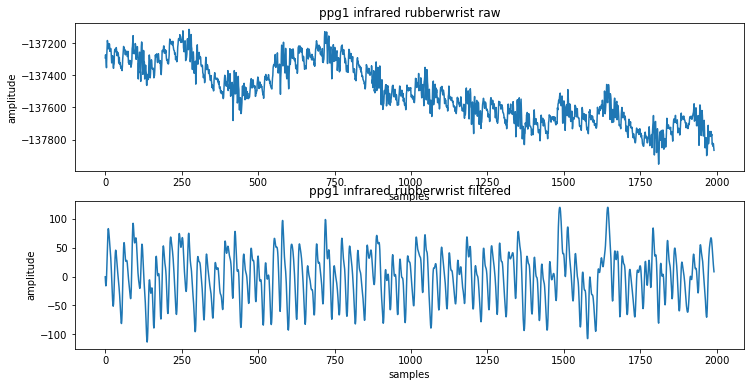

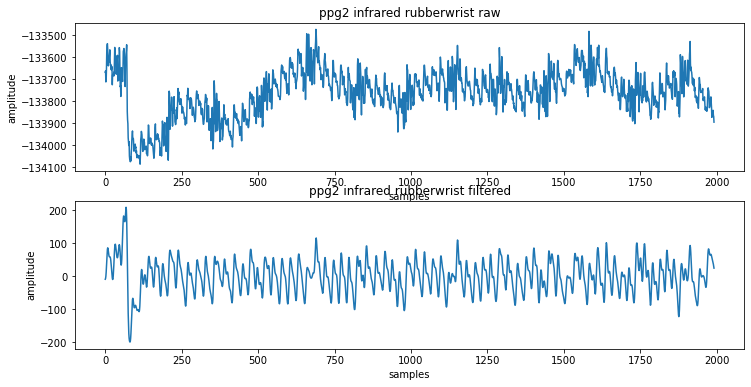

In [8]:
plotting(ppg1_inf_rubberwrist, ppg1_inf_rubberwrist_f, 'ppg1 infrared rubberwrist')
plotting(ppg2_inf_rubberwrist, ppg2_inf_rubberwrist_f, 'ppg2 infrared rubberwrist')


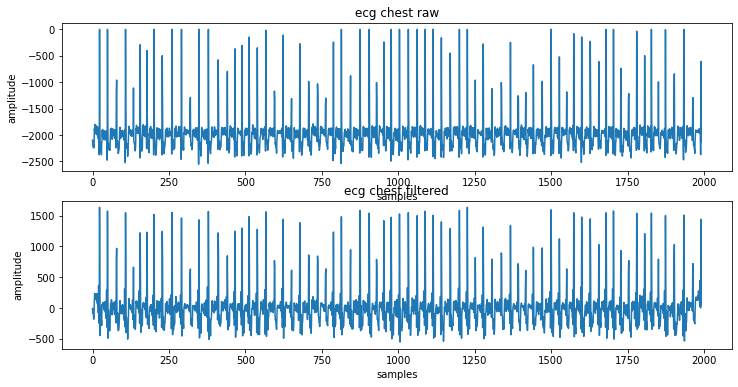

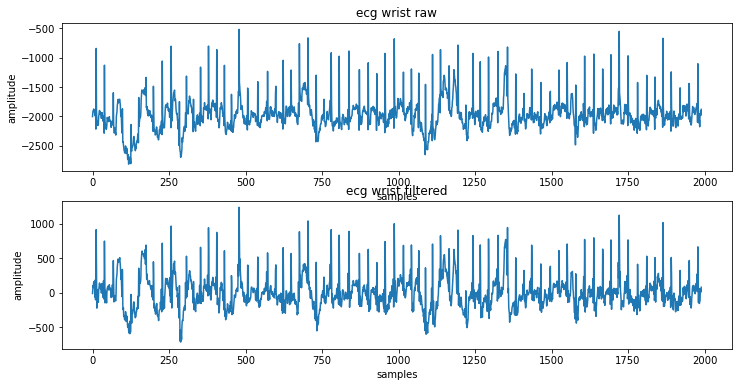

In [9]:
plotting(ecg_chest, ecg_chest_f, 'ecg chest')
plotting(ecg_wrist, ecg_wrist_f, 'ecg wrist')

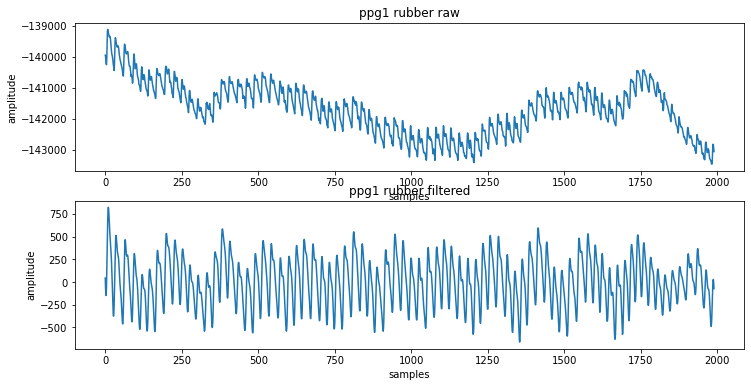

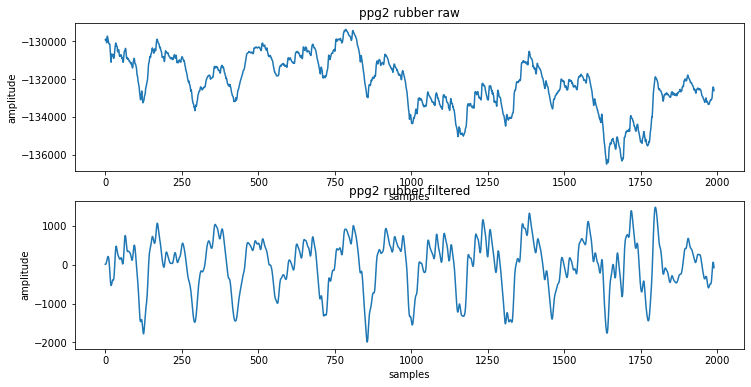

In [10]:
plotting(ppg1_rubber, ppg1_rubber_f, 'ppg1 rubber')
plotting(ppg2_rubber, ppg2_rubber_f, 'ppg2 rubber')

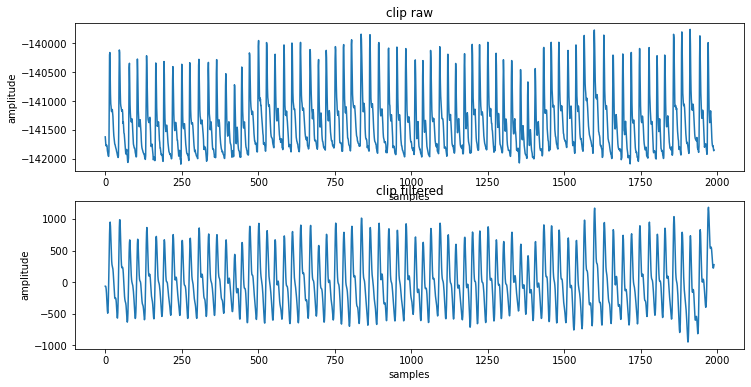

In [11]:
plotting(ppg1_clip, ppg1_clip_f, 'clip')

## Other functions

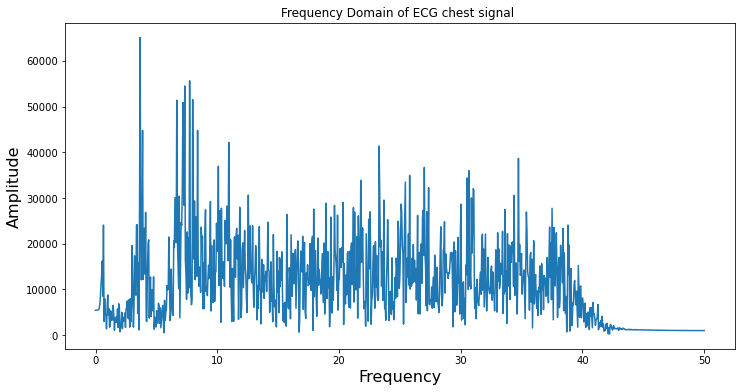

997 997


In [12]:
# FFT - Fourier transform

fs = 100
x_freq=np.fft.rfftfreq(len(ecg_chest_f),d = 1.0/fs) #frequency components in the signal
y_amp=np.abs(np.fft.rfft(ecg_chest_f,axis=0)) #amplitude of each frequency component

plt.figure(figsize=(12,6))
plt.title("Frequency Domain of ECG chest signal ")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(x_freq,y_amp)

plt.show()
print (len(x_freq),len(y_amp))

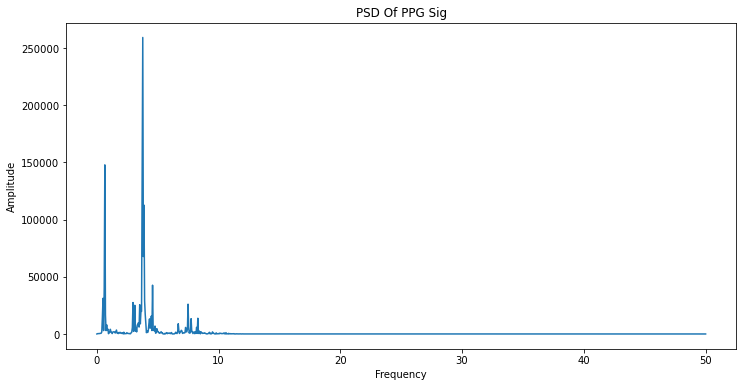

In [13]:
#PSD - power spectral density
#can be used to extract power band or entropy features of the signals
fs = 100
f, ppg_den = signal.periodogram(ppg1_rubber_f, fs)
#f: frequency components; ppg_den: power of the frequency component

#Plot the limited PSD-freq
plt.figure(figsize=(12,6))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("PSD Of PPG Sig")
plt.plot(f, ppg_den)

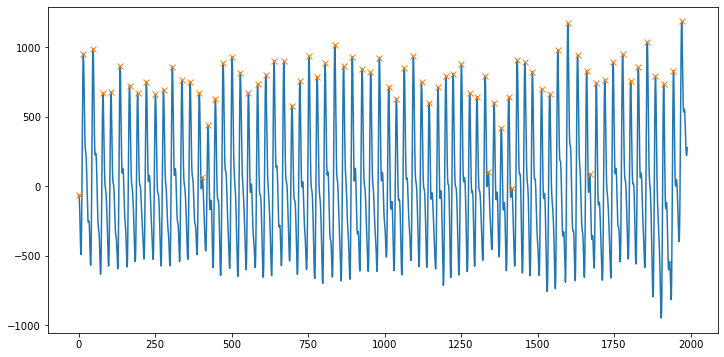

In [14]:
#peak detection
#argrelextrema
peak_location = sc.signal.argrelextrema(-1*ppg1_clip_f, np.greater, order = 5)[0]
plt.figure(figsize = (12,6))
plt.plot(-1*ppg1_clip_f)
plt.plot(peak_location, -1*ppg1_clip_f[peak_location], 'x')

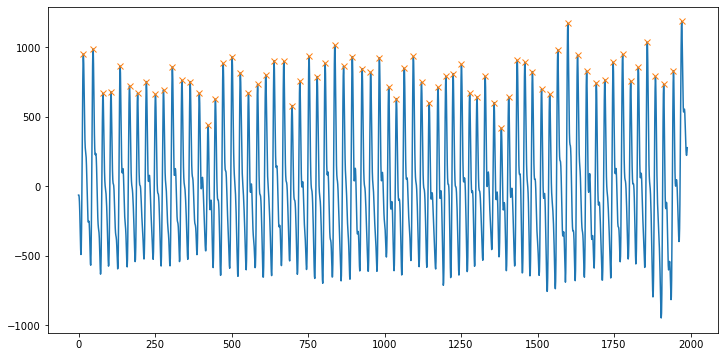

In [15]:
#findpeaks
peak = sc.signal.find_peaks(-1*ppg1_clip_f, distance = 12, height = 0,width = 2)[0]
plt.figure(figsize = (12,6))
plt.plot(-1*ppg1_clip_f)
plt.plot(peak, -1*ppg1_clip_f[peak], 'x')